Imports

In [2]:
#text preprocessing
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  #suppress warnings that may occur when making chained assignments in pandas.

#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

#test model
from sklearn.metrics import accuracy_score

/home/dina/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-06-19 01:30:11.522463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 01:30:12.087557: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-19 01:30:12.297870: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to r

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

In [53]:
pip install  spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Abstrat
With many individuals find comfort to share there feelings on social media, we aim to Utilize this data to detect and address the widespread depression and anxiety and support their mental health challenges.

Now we have 2 datasets one from riddet with classes (0 Normal, 1 Depressed),and the other from social media (0 anxiety, 1 Depressed) 

In [3]:
pd.set_option('display.max_colwidth', None) # we want to see full cell contents
df = pd.read_csv('depression_dataset_reddit_cleaned.csv')#load data
# socialData = pd.read_xlsx('dataset.xlsx')   #we tried the same steps with the other dataset and got the same results :)
df.head(10)

clean_text  \
0  we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnera

In [4]:
# rename cleaned text column to text
df.rename(columns={'clean_text': 'text'}, inplace=True)
# rename is_depression column to label
df.rename(columns={'is_depression': 'label'}, inplace=True)
df.head(10)

text  \
0  we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnerable to

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7731 non-null   object
 1   label   7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [6]:
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
df.dropna(inplace =True)
df.reset_index(inplace=True, drop=True)#remove rows with missing values

In [8]:
#str.maketrans() method is used to create the translation table, which maps each punctuation character in PUNCT_TO_REMOVE to None.
#The translate() method then applies this translation table to the input text string, removing all punctuation characters from it.
PUNCT_TO_REMOVE = string.punctuation #store the punctuations in a variable to remove them later on
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head(10)

text  \
0  we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnerable to

In [9]:
#convert to lower case
df["text"] = df["text"].str.lower()
df.head(10)

text  \
0  we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnerable to

In [10]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head(10)

,text,label
0,understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give get quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems like kind generous offer might perfectly well meaning unless solid rapport ha established wise idea point consider offer accept invitation communicate privately posting supportive reply publicly help people op response good quality educate inspire helper 9 90 rule http en wikipedia org wiki rule internet culture applies much doe anywhere else internet people struggling serious mental health issue often justifiably low tolerance disappointment high level ever changing emotional need unless helper able make 00 commitment every way long necessary offering personal inbox resource likely harm good mental health crisis line responder usually give name caller allowed request specific responder much healthier safer caller develop relationship agency whole analogously much safer healthier ops develop relationship community whole even trained responder generally allowed work high intensity situation alone partly availability mostly wider perspective preventing compassion fatigue helper get head someone whose mental health issue including suicidality often comorbid depression escalate pm conversation much harder others including r depression r suicidewatch moderator help contrary common assumption moderator see police pm observation many year people say pm consistently one least understanding mental health issue mental health support gap knowledge ability communicate effectively community input mitigates limitation reason someone truly help would want hide response community scrutiny helper concerned privacy keep mind self disclosure used supportively feeling detail problem use alt throwaway account restriction account age karma know internet used people exploit abuse others people want hide deceptive manipulative response everyone except victim many specifically target vulnerable mental health issue helper invite op talk privately give good supportive experience primed person vulnerable abuser sort cognitive priming tends particularly effective someone state mental health crisis people rely heuristic critical reasoning ops want talk privately posting wide open anonymous forum like reddit might best option although recommend allow ops request private contact asking support want please keep expectation realistic careful look history anyone offer pm opening,1
1,welcome r depression check post place take moment share going accomplishment want talk standalone post sub violate role model rule welcome tough time prefer make post place share subreddit rule located sidebar also always access r depression rule since exist important safety reason ask everyone read follow please click report harmful content see always want know deal soon also several wikis help finding giving support r depression wiki depression provides guidance depressive disorder guidance complex nature illness usually grouped depression label redirect information common topic issue r depression wiki giving help offer information nature value peer support mental health issue general lot guidance learning usually helpful giving peer support ysk type rule violation frequently see interfering people getting safe relevant support people breaking private contact rule never trust anyone try get private conv

In [11]:
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(5)

[('wa', 3810), ('like', 3584), ('feel', 3227), ('get', 2316), ('want', 2292)]

In [12]:
#reduce the dimensionality of the text data and improve the accuracy of text classification by removing most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(5)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text"] = df["text"].apply(lambda text: remove_freqwords(text))
df.head(10)

,text,label
0,understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems kind generous offer might perfectly well meaning unless solid rapport ha established wise idea point consider offer accept invitation communicate privately posting supportive reply publicly help people op response good quality educate inspire helper 9 90 rule http en wikipedia org wiki rule internet culture applies much doe anywhere else internet people struggling serious mental health issue often justifiably low tolerance disappointment high level ever changing emotional need unless helper able make 00 commitment every way long necessary offering personal inbox resource likely harm good mental health crisis line responder usually give name caller allowed request specific responder much healthier safer caller develop relationship agency whole analogously much safer healthier ops develop relationship community whole even trained responder generally allowed work high intensity situation alone partly availability mostly wider perspective preventing compassion fatigue helper head someone whose mental health issue including suicidality often comorbid depression escalate pm conversation much harder others including r depression r suicidewatch moderator help contrary common assumption moderator see police pm observation many year people say pm consistently one least understanding mental health issue mental health support gap knowledge ability communicate effectively community input mitigates limitation reason someone truly help would hide response community scrutiny helper concerned privacy keep mind self disclosure used supportively feeling detail problem use alt throwaway account restriction account age karma know internet used people exploit abuse others people hide deceptive manipulative response everyone except victim many specifically target vulnerable mental health issue helper invite op talk privately give good supportive experience primed person vulnerable abuser sort cognitive priming tends particularly effective someone state mental health crisis people rely heuristic critical reasoning ops talk privately posting wide open anonymous forum reddit might best option although recommend allow ops request private contact asking support please keep expectation realistic careful look history anyone offer pm opening,1
1,welcome r depression check post place take moment share going accomplishment talk standalone post sub violate role model rule welcome tough time prefer make post place share subreddit rule located sidebar also always access r depression rule since exist important safety reason ask everyone read follow please click report harmful content see always know deal soon also several wikis help finding giving support r depression wiki depression provides guidance depressive disorder guidance complex nature illness usually grouped depression label redirect information common topic issue r depression wiki giving help offer information nature value peer support mental health issue general lot guidance learning usually helpful giving peer support ysk type rule violation frequently see interfering people getting safe relevant support people breaking private contact rule never trust anyone try private conversation response post see r depression wiki private

In [13]:
#rare words may be typos, misspellings, or other errors, or they may be domain-specific or idiosyncratic words that are not relevant to the analysis.
#By removing rare words, you can reduce the dimensionality of the text data and improve the accuracy of text analysis tasks such as classification
# Drop the two columns which are no more needed

n_rare_words = 5
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text"] = df["text"].apply(lambda text: remove_rarewords(text))
df.head(10)

,text,label
0,understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems kind generous offer might perfectly well meaning unless solid rapport ha established wise idea point consider offer accept invitation communicate privately posting supportive reply publicly help people op response good quality educate inspire helper 9 90 rule http en wikipedia org wiki rule internet culture applies much doe anywhere else internet people struggling serious mental health issue often justifiably low tolerance disappointment high level ever changing emotional need unless helper able make 00 commitment every way long necessary offering personal inbox resource likely harm good mental health crisis line responder usually give name caller allowed request specific responder much healthier safer caller develop relationship agency whole analogously much safer healthier ops develop relationship community whole even trained responder generally allowed work high intensity situation alone partly availability mostly wider perspective preventing compassion fatigue helper head someone whose mental health issue including suicidality often comorbid depression escalate pm conversation much harder others including r depression r suicidewatch moderator help contrary common assumption moderator see police pm observation many year people say pm consistently one least understanding mental health issue mental health support gap knowledge ability communicate effectively community input mitigates limitation reason someone truly help would hide response community scrutiny helper concerned privacy keep mind self disclosure used supportively feeling detail problem use alt throwaway account restriction account age karma know internet used people exploit abuse others people hide deceptive manipulative response everyone except victim many specifically target vulnerable mental health issue helper invite op talk privately give good supportive experience primed person vulnerable abuser sort cognitive priming tends particularly effective someone state mental health crisis people rely heuristic critical reasoning ops talk privately posting wide open anonymous forum reddit might best option although recommend allow ops request private contact asking support please keep expectation realistic careful look history anyone offer pm opening,1
1,welcome r depression check post place take moment share going accomplishment talk standalone post sub violate role model rule welcome tough time prefer make post place share subreddit rule located sidebar also always access r depression rule since exist important safety reason ask everyone read follow please click report harmful content see always know deal soon also several wikis help finding giving support r depression wiki depression provides guidance depressive disorder guidance complex nature illness usually grouped depression label redirect information common topic issue r depression wiki giving help offer information nature value peer support mental health issue general lot guidance learning usually helpful giving peer support ysk type rule violation frequently see interfering people getting safe relevant support people breaking private contact rule never trust anyone try private conversation response post see r depression wiki private

In [14]:
#stemming step
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.ISRIStemmer()
def stem_text(text):
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)

    # Stem each word using the stemmer object
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text
df["text"] = df["text"].apply(stem_text)
df.head(10)

,text,label
0,understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems kind generous offer might perfectly well meaning unless solid rapport ha established wise idea point consider offer accept invitation communicate privately posting supportive reply publicly help people op response good quality educate inspire helper 9 90 rule http en wikipedia org wiki rule internet culture applies much doe anywhere else internet people struggling serious mental health issue often justifiably low tolerance disappointment high level ever changing emotional need unless helper able make 00 commitment every way long necessary offering personal inbox resource likely harm good mental health crisis line responder usually give name caller allowed request specific responder much healthier safer caller develop relationship agency whole analogously much safer healthier ops develop relationship community whole even trained responder generally allowed work high intensity situation alone partly availability mostly wider perspective preventing compassion fatigue helper head someone whose mental health issue including suicidality often comorbid depression escalate pm conversation much harder others including r depression r suicidewatch moderator help contrary common assumption moderator see police pm observation many year people say pm consistently one least understanding mental health issue mental health support gap knowledge ability communicate effectively community input mitigates limitation reason someone truly help would hide response community scrutiny helper concerned privacy keep mind self disclosure used supportively feeling detail problem use alt throwaway account restriction account age karma know internet used people exploit abuse others people hide deceptive manipulative response everyone except victim many specifically target vulnerable mental health issue helper invite op talk privately give good supportive experience primed person vulnerable abuser sort cognitive priming tends particularly effective someone state mental health crisis people rely heuristic critical reasoning ops talk privately posting wide open anonymous forum reddit might best option although recommend allow ops request private contact asking support please keep expectation realistic careful look history anyone offer pm opening,1
1,welcome r depression check post place take moment share going accomplishment talk standalone post sub violate role model rule welcome tough time prefer make post place share subreddit rule located sidebar also always access r depression rule since exist important safety reason ask everyone read follow please click report harmful content see always know deal soon also several wikis help finding giving support r depression wiki depression provides guidance depressive disorder guidance complex nature illness usually grouped depression label redirect information common topic issue r depression wiki giving help offer information nature value peer support mental health issue general lot guidance learning usually helpful giving peer support ysk type rule violation frequently see interfering people getting safe relevant support people breaking private contact rule never trust anyone try private conversation response post see r depression wiki private

In [15]:
df['label'].value_counts()

0    3900
1    3831
Name: label, dtype: int64

In [16]:
# len of rows with label 0
len(df[df['label'] == 0])

3900

0 -> Normal
1 -> depressed

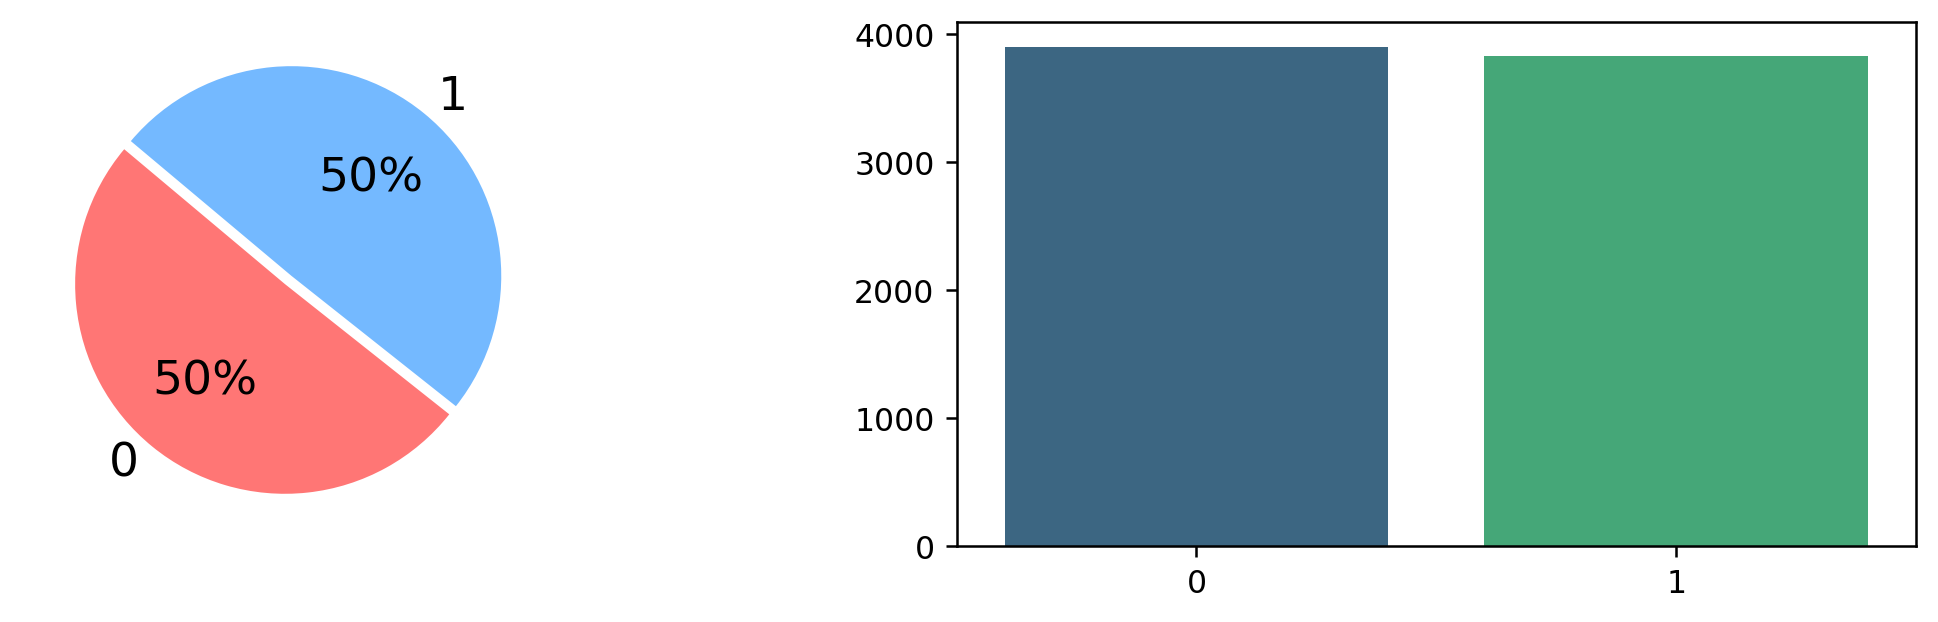

In [19]:
labels = [0,1]
sizes = [len(df[df['label'] == 0]), len(df[df['label'] == 1])]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(12, 3), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [18]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Vectorize data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)




In [119]:
# apply spacy to do word embedding
nlp = spacy.load('en_core_web_sm')

In [125]:
X_train_vecs_spacy = []
y_train_filtered = []
for text, label in zip(X_train, y_train):
    print(text)
    doc = nlp(text)
    if doc.has_vector:
        X_train_vecs_spacy.append(doc.vector)
        y_train_filtered.append(label)

X_train_vecs_spacy = np.vstack(X_train_vecs_spacy)
y_train_filtered = np.array(y_train_filtered)


X_test_vecs_spacy = []
y_test_filtered = []
for text, label in zip(X_test, y_test):
    doc = nlp(text)
    if doc.has_vector:
        X_test_vecs_spacy.append(doc.vector)
        y_test_filtered.append(label)

X_test_vecs_spacy = np.vstack(X_test_vecs_spacy)
y_test_filtered = np.array(y_test_filtered)

throat always closed today someone ha hand neck burning skin twitch eye many thing make mental battle go 0 time harder wish could day
realized urdu word depression dil shakistagi defeat heart feeling whatever war fighting sanity lost wall broken need rescue whoever coined really knew felt
yay time fuck depressed depressed adjective low spirit sad especially affected psychological depression vertically flattened central part lower margin http co pldmsm zxz
need someone calm stutter couple day ago best friend friend making fun somebody stutter cause aware one ever since realized easy people talk behind people back ever since wondered anyone make fun behind back taking individual people asking think make fun one post regarding someone said went ended getting psychosis paranoia one biggest fear read almost panic attack 0 minute ago still panic attack feeling vision messed fuzzy panic attack would terrified mean going crazy shake feeling scared mean going crazy thinking know anyone made fun

In [111]:
len(X_train_vecs_spacy)

6183

In [116]:
X_test_vectorized.shape

(1547, 16634)

In [127]:
len(X_test_vecs_spacy)

1546

In [128]:
len(y_test_filtered)

1546

### Train using embedding features

In [134]:
# Train the naive bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
naive_bayes_y_pred = naive_bayes.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, naive_bayes_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8112475759534583


In [129]:
radnom_forest = RandomForestClassifier()
radnom_forest.fit(X_train_vecs_spacy, y_train_filtered)

# Make predictions on the testing data
radnom_forest_y_pred = radnom_forest.predict(X_test_vecs_spacy)

# Calculate accuracy
accuracy = accuracy_score(y_test_filtered, radnom_forest_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8673997412677878


In [130]:
grediant_boosting = GradientBoostingClassifier()
grediant_boosting.fit(X_train_vecs_spacy, y_train_filtered)

# Make predictions on the testing data
grediant_boosting_y_pred = grediant_boosting.predict(X_test_vecs_spacy)

# Calculate accuracy
accuracy = accuracy_score(y_test_filtered, grediant_boosting_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.871927554980595


In [131]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_vecs_spacy, y_train_filtered)

# Make predictions on the testing data
decision_tree_y_pred = decision_tree.predict(X_test_vecs_spacy)

# Calculate accuracy
accuracy = accuracy_score(y_test_filtered, decision_tree_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7639068564036222


In [132]:
bagging_calssifier = BaggingClassifier()
bagging_calssifier.fit(X_train_vecs_spacy, y_train_filtered)

# Make predictions on the testing data
bagging_calssifier_y_pred = bagging_calssifier.predict(X_test_vecs_spacy)

# Calculate accuracy
accuracy = accuracy_score(y_test_filtered, bagging_calssifier_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8357050452781372


In [133]:
svc = SVC()
svc.fit(X_train_vecs_spacy, y_train_filtered)

# Make predictions on the testing data
svc_y_pred = svc.predict(X_test_vecs_spacy)

# Calculate accuracy
accuracy = accuracy_score(y_test_filtered, svc_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8822768434670116


## Apply for TFIDF features

In [ ]:
from sklearn.metrics import confusion_matrix

In [33]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plot a confusion matrix.
    
    Arguments:
    - cm: Confusion matrix (numpy array)
    - classes: List of class labels
    - normalize: Whether to normalize the confusion matrix (default: False)
    - cmap: Colormap (default: plt.cm.Blues)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black')
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.tight_layout()

In [22]:
# apply same models for vectorized data using tfidf vectorizer
# train radnom_forest
radnom_forest = RandomForestClassifier()
radnom_forest.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
radnom_forest_y_pred = radnom_forest.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, radnom_forest_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9263089851325146


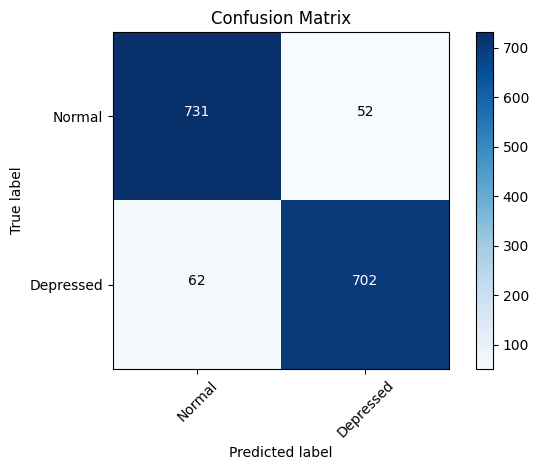

In [38]:
plot_confusion_matrix(confusion_matrix(y_test, radnom_forest_y_pred), classes=['Normal', 'Depressed'])

In [23]:
# train grediant_boosting
grediant_boosting = GradientBoostingClassifier()
grediant_boosting.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
grediant_boosting_y_pred = grediant_boosting.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, grediant_boosting_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9237233354880414


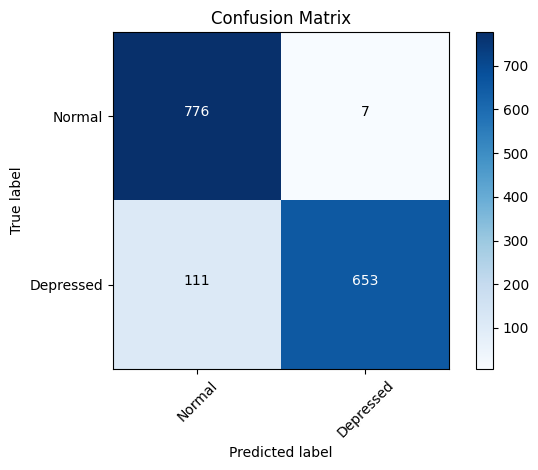

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, grediant_boosting_y_pred), classes=['Normal', 'Depressed'])

In [24]:
# train BaggingClassifier 
bagging_calssifier = BaggingClassifier()
bagging_calssifier.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
bagging_calssifier_y_pred = bagging_calssifier.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, bagging_calssifier_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8817065287653523


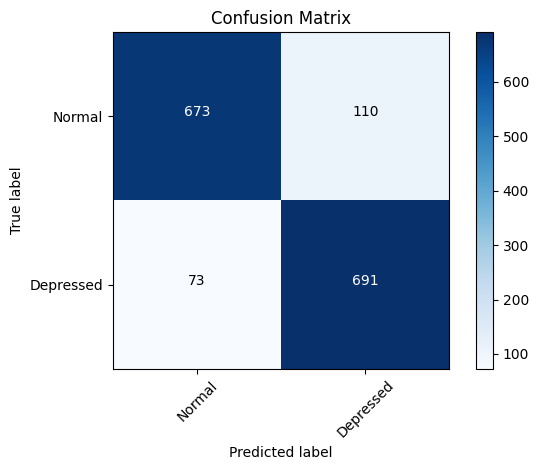

In [35]:
plot_confusion_matrix(confusion_matrix(y_test, bagging_calssifier_y_pred), classes=['Normal', 'Depressed'])

In [19]:
# train SVC
svc = SVC()
svc.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
svc_y_pred = svc.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, svc_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9599224305106658


In [1]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Create an SVC classifier
svc = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_vectorized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.9586011673508044


The default parameters are better than the grid searh params

In [22]:
# print the default parameters
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


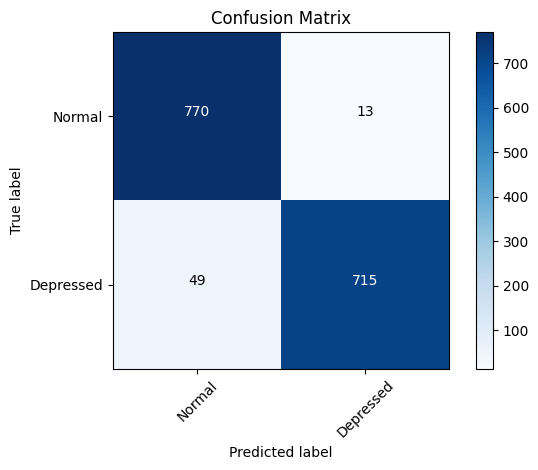

In [36]:
# apply confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, svc_y_pred), classes=['Normal', 'Depressed'])

THis is the best one :)

#### We can notice that TFIDF made a better accuracy with different models

In [82]:
# create a function that takes a string and returns a prediction
def predict_depression(text):
    ## 0-> not depressed, 1-> depressed

    # clean the text
    text = remove_punctuation(text)
    text = text.lower()
    text = remove_stopwords(text)
    text = remove_freqwords(text)
    text = remove_rarewords(text)
    text = stem_text(text)

    # vectorize the tweet
    text_vectorized = vectorizer.transform([text])

    # make prediction
    prediction = svc.predict(text_vectorized)

    # return output
    return prediction

In [83]:
# read dataset.xlsx
df = pd.read_excel('dataset.xlsx')

In [84]:
# select rows with label 0
df_0 = df[df['label'] == 0]

In [88]:
df_0.dropna(inplace=True)

In [89]:
 # predict df_0 text in svm model
df_0['prediction'] = df_0['text'].apply(predict_depression)

In [91]:
# prnt count value of prediction column
df_0['prediction'].value_counts()

[0]    5936
[1]     304
Name: prediction, dtype: int64

This is a nice result 

In [92]:
# print rows with prediction 0
df_0[df_0['prediction'] == 0]

,text,label,prediction
733,"Gr gr dreaming of ex crush to be my game, God",0.0,[0]
734,wkwkwk what a joke,0.0,[0]
735,Leaves are also standby in front of the PC ... because the office is no longer on leave,0.0,[0]
736,Thank God even though it's just a ride through,0.0,[0]
737,"wedding teaser concept using the song day6 - only, sounds good ga siiih",0.0,[0]
...,...,...,...
6977,I can't forget you #SpiritHadrian,0.0,[0]
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.DJ DAIKI! DJ DAIKI!!!..#Hey!Say!JUMP.#æœ‰å²¡ ²´,0.0,[0]
6979,Dai5y! <3,0.0,[0]
6980,tired of clowns but still hopefully tonight if not tomorrow ™ but mas tm also no teaser yet.....,0.0,[0]


In [93]:
df_0[df_0['prediction'] == 1]

,text,label,prediction
740,1.7 fucking years,0.0,[1]
745,"I like to be grateful, don't you think, if you stay away from a guy, then not long after that he's updated and he's got a new girl WKWK maybe he feels handsome but I feel really bad about it hah you move so fast, it's a good thing I'm with you <3",0.0,[1]
771,does anyone have co shpe 5.5 the goods haven't arrived until now?,0.0,[1]
788,It's a hassle when you take care of my life,0.0,[1]
845,"You don't have to complicate things anymore, people",0.0,[1]
...,...,...,...
6904,"It's just a matter of making a fuss, what if someone else is asked for a ""ration""? Wkwkwkwk",0.0,[1]
6920,"always think they are the protagonist, even though I have been the protagonist. even in my own life",0.0,[1]
6921,"In this life sometimes we don't need a lot of money and rich to enjoy life. It's enough just to be grateful for what we have and have enough to be happy. That's why we Muslims are strongly encouraged to always be grateful, even if it's a small favor",0.0,[1]
6947,Everyone call me brother we don't even know you call brother ðŸ˜ you look very old already,0.0,[1]


In [94]:
# predict df with label 1 text in svm model
df_1 = df[df['label'] == 1]

In [96]:
df_1

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless heart. All out of tune",1.0
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",1.0
3,I've shifted my focus to something else but I'm still worried,1.0
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",1.0
...,...,...
728,I'm really worried but I don't know why,1.0
729,It's never too late to take care of yourself if the anxiety created by your own mind doesn't always prove to be true...,1.0
730,"It's really restless since yesterday thinking about another second in class 12, preparations for SM are still a little bit, there's a lot to worry about",1.0
731,Restless and agitated,1.0


In [100]:
# drop rows with missing values
df_1.dropna(inplace=True)

In [101]:
# predict df_1 text in svm model
df_1['prediction'] = df_1['text'].apply(predict_depression)

In [102]:
df_1

,text,label,prediction
0,oh my gosh,1.0,[0]
1,"trouble sleeping, confused mind, restless heart. All out of tune",1.0,[0]
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",1.0,[0]
3,I've shifted my focus to something else but I'm still worried,1.0,[1]
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",1.0,[0]
...,...,...,...
728,I'm really worried but I don't know why,1.0,[1]
729,It's never too late to take care of yourself if the anxiety created by your own mind doesn't always prove to be true...,1.0,[1]
730,"It's really restless since yesterday thinking about another second in class 12, preparations for SM are still a little bit, there's a lot to worry about",1.0,[1]
731,Restless and agitated,1.0,[0]


In [104]:
df_1['prediction'].value_counts()

[0]    517
[1]    213
Name: prediction, dtype: int64

### most of the anxiety text is classified as non depressed and that makes sense

In [105]:
# print rows with prediction 0
df_1[df_1['prediction'] == 0]

,text,label,prediction
0,oh my gosh,1.0,[0]
1,"trouble sleeping, confused mind, restless heart. All out of tune",1.0,[0]
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",1.0,[0]
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",1.0,[0]
5,"every break, you must be nervous, like something is wrong, but what the heck",1.0,[0]
...,...,...,...
722,I'm so nervous I feel why,1.0,[0]
724,sleep really restless duh don't like it,1.0,[0]
725,I swear I've been feeling restless since morning,1.0,[0]
726,Feeling excessively anxious all the time can disrupt sleep patterns or not?,1.0,[0]


In [106]:
df_1[df_1['prediction'] == 1]

,text,label,prediction
3,I've shifted my focus to something else but I'm still worried,1.0,[1]
7,Have you ever felt nervous but didn't know why?,1.0,[1]
14,Sometimes it's your own thoughts that make you anxious and afraid to close your eyes until you don't sleep,1.0,[1]
15,"Every time I wake up, I'm definitely nervous and excited, until when are you going to try ™‚",1.0,[1]
20,"I've been the most anxious person before I became the most sincere person, I've also been the most worried person before it all ended",1.0,[1]
...,...,...,...
727,"They say that if we are snacking all the time we are lazy, it could be that we are restless/something is on our minds. That's right,",1.0,[1]
728,I'm really worried but I don't know why,1.0,[1]
729,It's never too late to take care of yourself if the anxiety created by your own mind doesn't always prove to be true...,1.0,[1]
730,"It's really restless since yesterday thinking about another second in class 12, preparations for SM are still a little bit, there's a lot to worry about",1.0,[1]


Conclusion

Normal text is classified as normal in both, depressed is depressed in both,  anexity is the class that fluvuate between the 2 models due the diffrances in the datasets. by eye analysis we decided to:
- depressed if depressed in both
- normal if normal in this model
- if diff outputs then anexity